In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [77]:
#Load the data set
def read_data(path):
    data = pd.read_csv(path)
    return data

In [78]:
url=r"D:\Topmentor\Oct\29th oct\b88assignments\Project - 3&4_Multiple_Reg\Project - 3&4_Multiple_Reg\50_Startups.csv"
df = read_data(url)

In [79]:
# Display the first few rows of the dataset
print(df.head())
print("---------------------------------")

# Display information about the dataset
print(df.info())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [80]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [81]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [82]:
### Preprocessing and Feature Engineering
df_copy = df.copy()
print(df_copy)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

C:\Users\swenc\AppData\Local\Temp\ipykernel_7444\4042109939.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


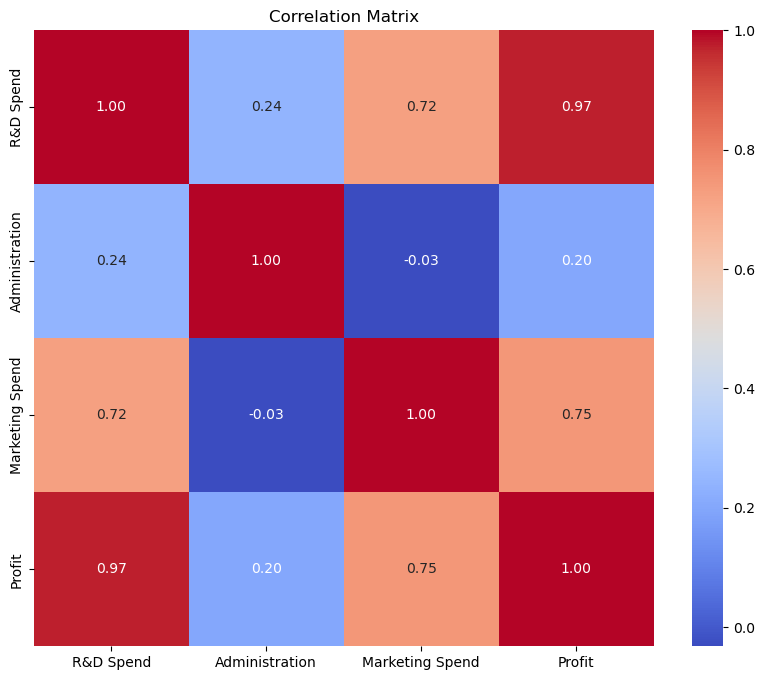

In [83]:
#Visualize the correlation matrix using a heatmap
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

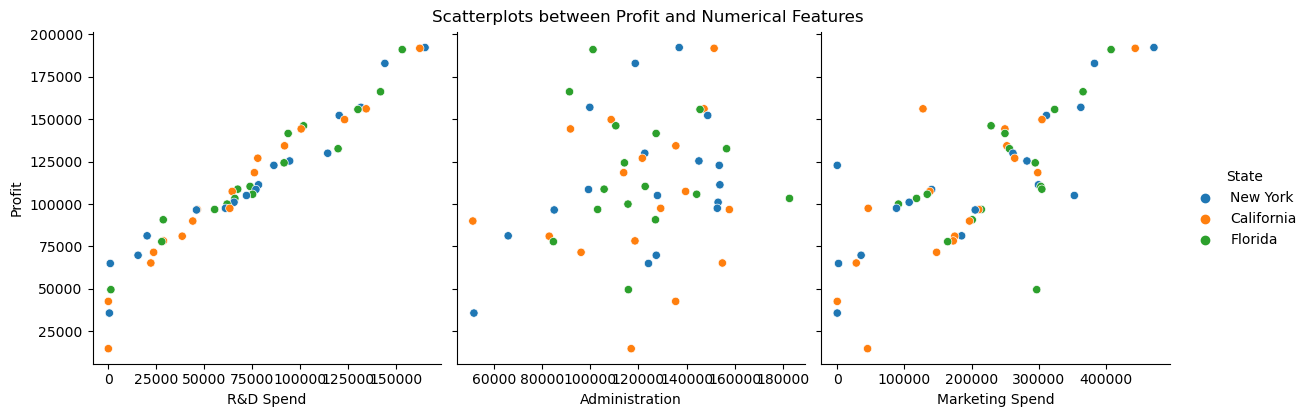

<Figure size 640x480 with 0 Axes>

In [182]:
# Visualize the relationship between Profit and numerical features

sns.pairplot(df, x_vars=['R&D Spend', 'Administration', 'Marketing Spend'], y_vars='Profit',hue ='State', height=4, aspect=1)
plt.suptitle('Scatterplots between Profit and Numerical Features', y=1.02)
plt.show()
plt.savefig("D:/Topmentor/Oct/29th oct/50_Startup/pairplot_50starup1.png")

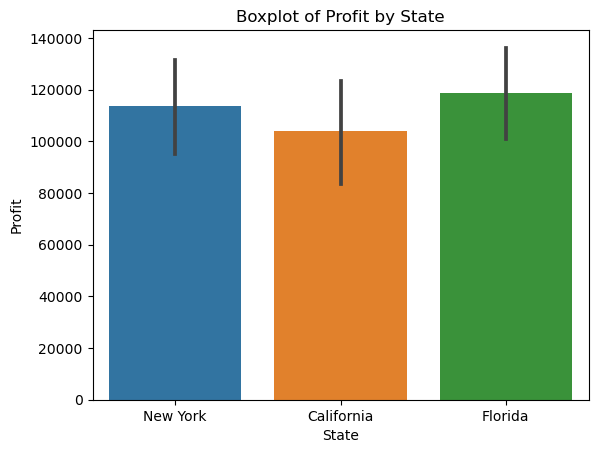

In [85]:
# Visualize the relationship between Profit and State (categorical feature)
sns.barplot(x='State', y='Profit', data=df)
plt.title('Boxplot of Profit by State')
plt.show()

In [86]:
 df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [87]:
### Converting the Textual Column to Numerical Colum is called as Encoding
d={'New York':0,'California':1,'Florida':2}
print(d)

{'New York': 0, 'California': 1, 'Florida': 2}


In [88]:
#mapping in new column name
df_copy['count_map'] = df_copy['State'].map(d)
df_copy.drop('count_map', axis = 1, inplace = True)
df_copy

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [89]:
### One hot Encoding
dumm = pd.get_dummies(df_copy['State']).astype('int')
final_data = pd.concat([df_copy,dumm], axis = 1)
final_data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'California', 'Florida', 'New York'],
      dtype='object')

In [90]:
X = final_data[['R&D Spend','Administration', 'Marketing Spend','California', 'Florida', 'New York']]
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [91]:
y = final_data[['Profit']]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [172]:
## Now  Model Building

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=1234)
X_train.head(2)

model=LinearRegression()
model_train = model.fit(X_train,y_train)
pred1 = model_train.predict(X_test)
pred1


array([[ 92531.10641376],
       [ 46482.82452022],
       [160474.57456196],
       [ 66496.45002329],
       [129631.90736555],
       [ 74004.41170643],
       [150477.63298555],
       [100479.61020034],
       [171564.92610869],
       [ 50391.73836456],
       [115822.61015533],
       [128047.43403092],
       [134706.64446954]])

In [171]:
### Create a predictor column
dd = pd.DataFrame(pred1,columns=['Predctor'])
dd['Actual'] =y_test.values
print(dd.head(4))

        Predctor     Actual
0   92531.106414   89949.14
1   46482.824520   64926.08
2  160474.574562  156122.51
3   66496.450023   65200.33


In [152]:
coef = model_train.coef_
print(coef)
print("------------------------------------------------")
print("R&D Spend Coefficient (0.8103):\n\tThe positive coefficient indicates that an increase in R&D spending is associated with an increase in profit.")
print("       ")
print("Administration Coefficient (-0.0377):\n\tThe negative coefficient suggests that higher administration costs are associated with a decrease in profit.")
print("       ")
print("Marketing Spend Coefficient (0.0260):\n\tThe positive coefficient implies that an increase in marketing spending is associated with a rise in profit.")
print("       ")
print("California Coefficient (2204.74):\n\tThe positive coefficient for California indicates that, on average, companies based in California have a higher profit compared to the baseline .")
print("       ")
print("Florida Coefficient (-1086.70):\n\tThe negative coefficient for Florida suggests that, on average, companies based in Florida have lower profit compared to the baseline.")
print("      ")
print("New York Coefficient (-1118.04):\n\tThe negative coefficient for New York suggests that, on average, companies based in New York have lower profit compared to the baseline.")




[[ 8.10267499e-01 -3.77279914e-02  2.60256860e-02  2.20473649e+03
  -1.08669509e+03 -1.11804140e+03]]
------------------------------------------------
R&D Spend Coefficient (0.8103):
	The positive coefficient indicates that an increase in R&D spending is associated with an increase in profit.
       
Administration Coefficient (-0.0377):
	The negative coefficient suggests that higher administration costs are associated with a decrease in profit.
       
Marketing Spend Coefficient (0.0260):
	The positive coefficient implies that an increase in marketing spending is associated with a rise in profit.
       
California Coefficient (2204.74):
	The positive coefficient for California indicates that, on average, companies based in California have a higher profit compared to the baseline .
       
Florida Coefficient (-1086.70):
	The negative coefficient for Florida suggests that, on average, companies based in Florida have lower profit compared to the baseline.
      
New York Coefficient (

In [148]:
#Insight:
print("\t1.Focus on increasing R&D spending, as it has a positive impact on profit.")
print("\t2.Implement cost-cutting measures in administration to optimize overall expenses.")
print("\t3.Strategically invest in marketing activities to drive profitability.")
print("\t4.Explore opportunities to leverage the positive business environment in California for increased profitability.")
print("\t5.Analyze and address challenges in Florida and New York to improve profit margins in these regions.")

	1.Focus on increasing R&D spending, as it has a positive impact on profit.
	2.Implement cost-cutting measures in administration to optimize overall expenses.
	3.Strategically invest in marketing activities to drive profitability.
	4.Explore opportunities to leverage the positive business environment in California for increased profitability.
	5.Analyze and address challenges in Florida and New York to improve profit margins in these regions.


In [155]:
intercept=model_train.intercept_
print("Intercept value(baseline ref value): ",np.round(intercept))
print("                 ")
print("The intercept in a linear regression model represents the predicted value of the dependent variable (profit, in this case) when all independent variables are zero. In this context, the intercept of 51425 suggests that, with zero spending on R&D, administration, and marketing, and in the baseline state (reference state), the predicted profit would be $51,425.")

Intercept value(baseline ref value):  [51425.]
                 
The intercept in a linear regression model represents the predicted value of the dependent variable (profit, in this case) when all independent variables are zero. In this context, the intercept of 51425 suggests that, with zero spending on R&D, administration, and marketing, and in the baseline state (reference state), the predicted profit would be $51,425.


In [168]:
sqrt_value=sqrt(mean_squared_error(dd['Actual'],dd['Predctor']))
print("Root Mean Squared Error =",round(sqrt_value, 1))
print("---------------------")
print("\tWith an RMSE of 8280.23, the company can have confidence that the model provides reasonably reliable predictions of profit, allowing for better planning and decision-making.")

Root Mean Squared Error = 8280.2
---------------------
	With an RMSE of 8280.23, the company can have confidence that the model provides reasonably reliable predictions of profit, allowing for better planning and decision-making.


In [169]:
Strength_of_model = r2_score(dd['Actual'],dd['Predctor'])   ### Strength of the model
print("Strength of model: ", round(Strength_of_model,2))
# Evaluate the model
print("\tWith a high R^2 score, the company can identify optimization opportunities in resource allocation (R&D, Administration, Marketing) to maximize profit.\nFor example, if increasing R&D spending is associated with higher profits, the company might consider allocating more resources to research and development.")

Strength of model:  0.96
	With a high R^2 score, the company can identify optimization opportunities in resource allocation (R&D, Administration, Marketing) to maximize profit.
For example, if increasing R&D spending is associated with higher profits, the company might consider allocating more resources to research and development.


In [170]:
 #### Saiving the model Using a Joblib
import joblib
filename = 'joblip_reg_model.sav'
joblib.dump(model_train,filename)
#### Loading the Model --
loaded_model = joblib.load(filename)
print(loaded_model)

y_predict = loaded_model.predict(X_test)
y_predict

LinearRegression()


array([[ 92531.10641376],
       [ 46482.82452022],
       [160474.57456196],
       [ 66496.45002329],
       [129631.90736555],
       [ 74004.41170643],
       [150477.63298555],
       [100479.61020034],
       [171564.92610869],
       [ 50391.73836456],
       [115822.61015533],
       [128047.43403092],
       [134706.64446954]])